# Modeling exercise

## General Instructions

* Submission date: 25.4.2022
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1fTmjiVxzw_rM1hdh16enwUTtxzlHSJIiw41dJS2LKp0/edit?usp=sharing).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('../Modles and Modeling/src')
import numpy as np
import plotly_express as px

In [3]:
import pandas as pd
import ipywidgets as widgets

In [4]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [5]:
from sklearn.datasets import make_moons

In [6]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

,x,y,label
0,0.578741,-0.365700,B
1,-0.821785,0.604713,A
2,-0.114250,0.612402,B
3,-0.829271,0.434892,A
4,1.456752,-0.316191,B


In [7]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [8]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,-0.888136,0.459580,A
1,-0.492727,-0.870184,A
2,-0.609954,0.517645,B
3,-0.658826,0.453815,B
4,0.379779,-0.925077,A


In [9]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

# Answer - Building an experiment

### 1. Creating MOONs and CIRCLEs Datasets

In [34]:
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
DS_NAME = ['Moon', 'Circle']
dfWithMoonAndCircle = pd.DataFrame()  

In [35]:
def getDataFrameByName(dataset_name,noise_level):
    return  make_moons_dataframe(n_samples = 10000, noise_level = noise_level)  if dataset_name == 'Moon' else make_circles_dataframe(n_samples = 10000, noise_level = noise_level)

In [36]:
for dataset_name in DS_NAME:
    for noise_level in noise_levels:
        temp_df = getDataFrameByName(dataset_name,noise_level)
        temp_df['noise_level'] = noise_level
        temp_df['DS_NAME'] = dataset_name
        dfWithMoonAndCircle = pd.concat([dfWithMoonAndCircle, temp_df])
dfWithMoonAndCircle

,x,y,label,noise_level,DS_NAME
0,-0.447624,0.894222,A,0.0,Moon
1,1.536718,-0.343762,B,0.0,Moon
2,1.462174,-0.386789,B,0.0,Moon
3,-0.619199,0.785234,A,0.0,Moon
4,0.002565,0.428419,B,0.0,Moon
...,...,...,...,...,...
9995,-0.399793,0.931488,B,0.5,Circle
9996,-0.334852,-0.372714,B,0.5,Circle
9997,0.492084,-0.433914,B,0.5,Circle
9998,0.298431,-0.845360,B,0.5,Circle


### 2. Running Models

Before we beging the Hyper Parameter Search (HPS), we should choose the most appropriate **Evaluation Tool**. Our Data is balaced and there is no "favorite" label we prefer increase its Identification. Therefore we will ues **ACCURACY** as our evloation tool.

**MODELS:**
1. ***Logistic Regression*** (logit), as Linear Model, uses as *Low Capcity* Model in our paper.
1. ***Support Vector Machine*** (SVM), as more Complex model, uses as *High Capcity* Model in our paper.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [13]:
def getExperimantOfClassficationByClassficationName(dataset,clf_method,hyper_parameter,data_frame,k_fold,n,noise_level,clf_name):
    score = cross_validate(clf_method, data_frame[['x', 'y']], data_frame['label'], cv = k_fold, return_train_score = True)
    TRE = score['train_score'].mean()
    TESTE = score['test_score'].mean()
    E_DIFF = TRE - TESTE
    return (dataset, n, noise_level, clf_name, 5, TRE, TESTE, E_DIFF, hyper_parameter)
    

In [14]:
CLF_NAME = ['svm', 'logistic', 'knn']
C_for_logostic_regression = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gammas = [0.001 ,0.005, 0.01 ,0.1, 0.5, 1 ,5 , 10, 100, 1000]
k_fold = KFold(n_splits = 5)
result = []

In [15]:
for dataset in DS_NAME:
    for clf_name in CLF_NAME:
        for n in n_samples:
            for noise_level in noise_levels:
                temp_df = dfWithMoonAndCircle.query('DS_NAME == @dataset and noise_level == @noise_level').sample(n)
                if clf_name == 'svm':
                    for gamma in gammas:
                        classifier_svm = svm.SVC(kernel = 'rbf' , gamma = gamma)
                        result.append(getExperimantOfClassficationByClassficationName(dataset,classifier_svm ,gamma,temp_df,k_fold,n,noise_level,clf_name))
                
                elif clf_name == 'logistic':
                    for c in C_for_logostic_regression:
                        logit = LogisticRegression(penalty = 'l2', C = c)
                        result.append(getExperimantOfClassficationByClassficationName(dataset,logit,c,temp_df,k_fold,n,noise_level,clf_name))

In [16]:
result_df = pd.DataFrame(result, columns = ['DS_NAME', 'N', 'NL', 'CLF_NAME', 'KFOLDS', 'TRE', 'TESTE', 'E_DIFF', 'REGULARIZATIN_or_HPS'])
result_df

,DS_NAME,N,NL,CLF_NAME,KFOLDS,TRE,TESTE,E_DIFF,REGULARIZATIN_or_HPS
0,Moon,10,0.0,svm,5,0.72500,0.5000,0.22500,0.001
1,Moon,10,0.0,svm,5,0.72500,0.5000,0.22500,0.005
2,Moon,10,0.0,svm,5,0.72500,0.5000,0.22500,0.010
3,Moon,10,0.0,svm,5,0.75000,0.5000,0.25000,0.100
4,Moon,10,0.0,svm,5,0.82500,0.5000,0.32500,0.500
...,...,...,...,...,...,...,...,...,...
1015,Circle,10000,0.5,logistic,5,0.50545,0.4917,0.01375,0.100
1016,Circle,10000,0.5,logistic,5,0.50550,0.4916,0.01390,1.000
1017,Circle,10000,0.5,logistic,5,0.50550,0.4915,0.01400,10.000
1018,Circle,10000,0.5,logistic,5,0.50550,0.4915,0.01400,100.000


In [19]:
result_df.to_csv('Result DataFrame - Modeling Exercise 21_04_2022.csv', index = False)

# Answer - Analysing the expermient results¶

### Q1

In [29]:
dfWithSvmAnd10K = result_df.query('CLF_NAME == "svm" and N == 10000 ')
dfWithSvmAnd10K.groupby(['DS_NAME']).min().reset_index()

,DS_NAME,N,NL,CLF_NAME,KFOLDS,TRE,TESTE,E_DIFF,REGULARIZATIN_or_HPS
0,Circle,10000,0.0,svm,5,0.50145,0.4838,-0.00005,0.001
1,Moon,10000,0.0,svm,5,0.79985,0.7605,-0.00040,0.001


### Q2

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [17]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:




Your 

You experiment code should look something like that:

In [18]:
datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_range = <'Your hyper parameters ranges here'>
regularization_values = <'Your regularization values here'>
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = datasets.query(<'your query here'>).head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                X, Y = <'Your code here'>
                x_train,x_test,y_train,y_test= <'Your code here'>
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)
                    if clf_type == 'svm':
                        for gamma in hp_range:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)

SyntaxError: invalid syntax (3386946450.py, line 6)

### Question 1 - Manual Classification

The purpose of this excercise is to examplify the need in a fitting algorithm. We will do so by trying to find only 2 models parameters by ourselves. 

In [30]:
slope, intercept = 2.5, 6

In [31]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [32]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

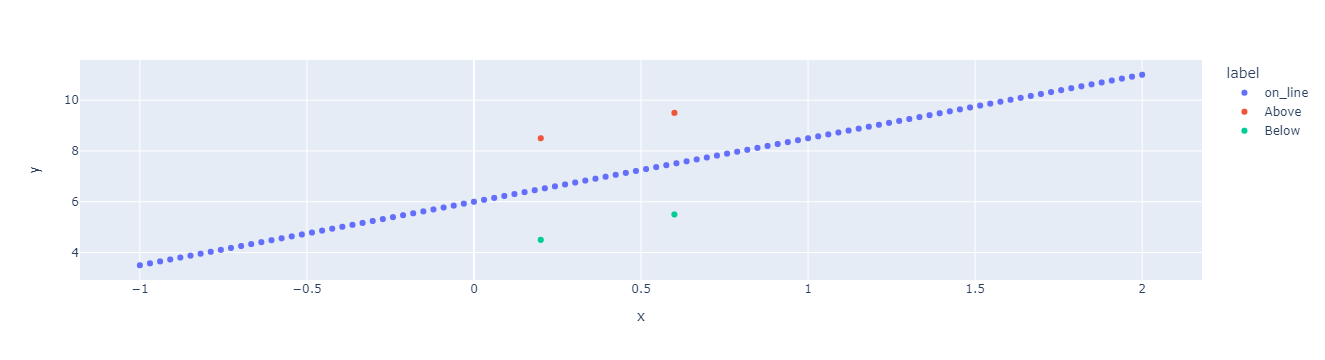

In [33]:
px.scatter(data, x='x', y='y', color = 'label')